# Explorative Analyse von Geodaten

## 1. Daten einlesen

In diesem Notebook wird eine explorative Analyse der räumlichen Daten durchgeführt. Dazu gehört die geographische Verteilung der Häufigkeiten bestimmter Request analysiert. 

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [43]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_info_columns', 10000)   # zeigt alle Spaltennamen in info()
pd.set_option('display.max_info_rows', 200000)     # zeigt Zeileninfo, wenn nötig


# Pfad zur Datei (liegt im gleichen Ordner wie das Notebook)
path = Path("dataset/311_Service_Requests_2024.csv")

# Einfacher Import
df = pd.read_csv(path)

In [44]:
pd.set_option('display.float_format', '{:.3f}'.format) #damit auf 2 nachkommstellen gerunded wird
df.describe()

,ZIP_CODE,LEGACY_SR_NUMBER,COMMUNITY_AREA,WARD,ELECTRICAL_DISTRICT,POLICE_SECTOR,POLICE_DISTRICT,POLICE_BEAT,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE
count,1702975.000,0.000,1912120.000,1912188.000,41550.000,1912252.000,1912252.000,1912252.000,1911746.000,0.000,1913929.000,1913929.000,1913929.000,1912914.000,1912914.000,1912867.000,1912867.000
mean,60630.419,NaN,40.491,28.690,6.818,2.518,13.057,1334.570,30.740,NaN,12.970,3.929,6.280,1151524.745,1901717.675,41.886,-87.719
std,22.852,NaN,23.224,11.154,4.115,1.295,4.888,491.935,14.324,NaN,4.959,1.855,3.312,24537.285,30081.569,0.082,0.089
min,60018.000,NaN,1.000,1.000,1.000,0.000,1.000,111.000,1.000,NaN,0.000,1.000,1.000,-87.781,41.928,41.645,-87.911
25%,60612.000,NaN,28.000,25.000,3.000,2.000,12.000,1225.000,21.000,NaN,9.000,2.000,4.000,1142989.264,1896560.962,41.872,-87.750
50%,60618.000,NaN,28.000,28.000,6.000,2.000,12.000,1225.000,27.000,NaN,13.000,4.000,6.000,1162234.467,1896560.962,41.872,-87.680
75%,60649.000,NaN,66.000,41.000,10.000,3.000,16.000,1654.000,46.000,NaN,17.000,5.000,9.000,1162234.467,1928515.056,41.960,-87.680
max,60827.000,NaN,77.000,50.000,15.000,5.000,31.000,3100.000,57.000,NaN,23.000,7.000,12.000,1205129.531,1951640.529,42.023,-87.525


## 2. Räumliche Verteilung (Scatterplot)

Räumliche Verteilung mit Scatterplot

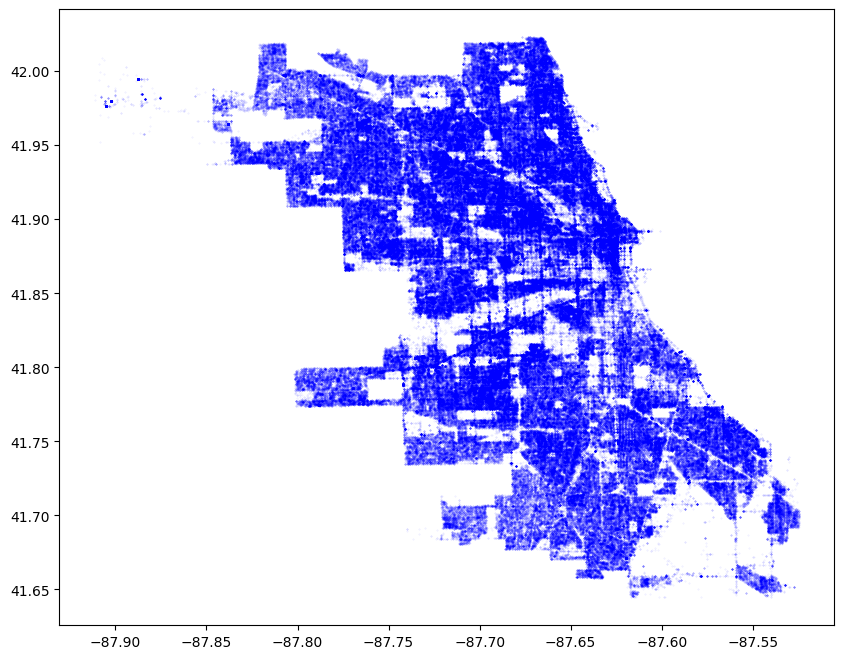

In [45]:
plt.figure(figsize=(10,8))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], s=0.1, alpha=0.1, c='blue') #mit s grösse ändern der punkte

## 3. Räumliche Dichte (Hexbin)

### 3.1 Erster Hexbin - nicht logarithmisch, ohne vmax

Vorteil gegenüber Scatterplot: Im Scatterplot haben wir das Problem vom "Overplotting". Die Punkte liegen so nahe beisammen, sodass man im Plot meist nur eine blaue Fläche erkennt. Hexbins aggregieren Punkte räumlich, wodurch die Dichte deutlich wird. Dadurch werden Punkte, die sich überlagern,in einer anderen Farbe abgebildet. 

654890.0


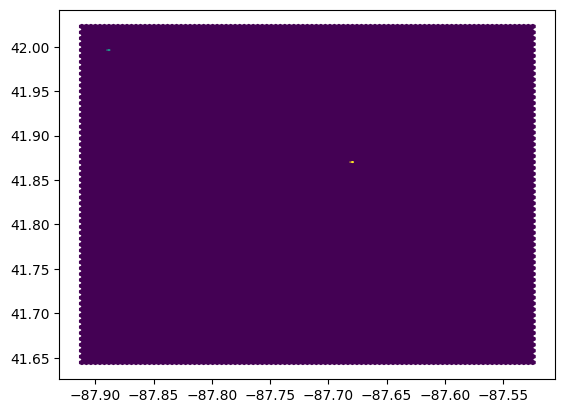

In [46]:
hb = plt.hexbin(df['LONGITUDE'], df['LATITUDE'])
print(hb.get_array().max())

Im Hexbin erkennt man 2 Punkte. Das deuted darauf hin, dass viele Requests diese beiden Punkte als Geodaten eigetragen haben

### 3.2 Hexbin - linear und linear mit vmax=1500

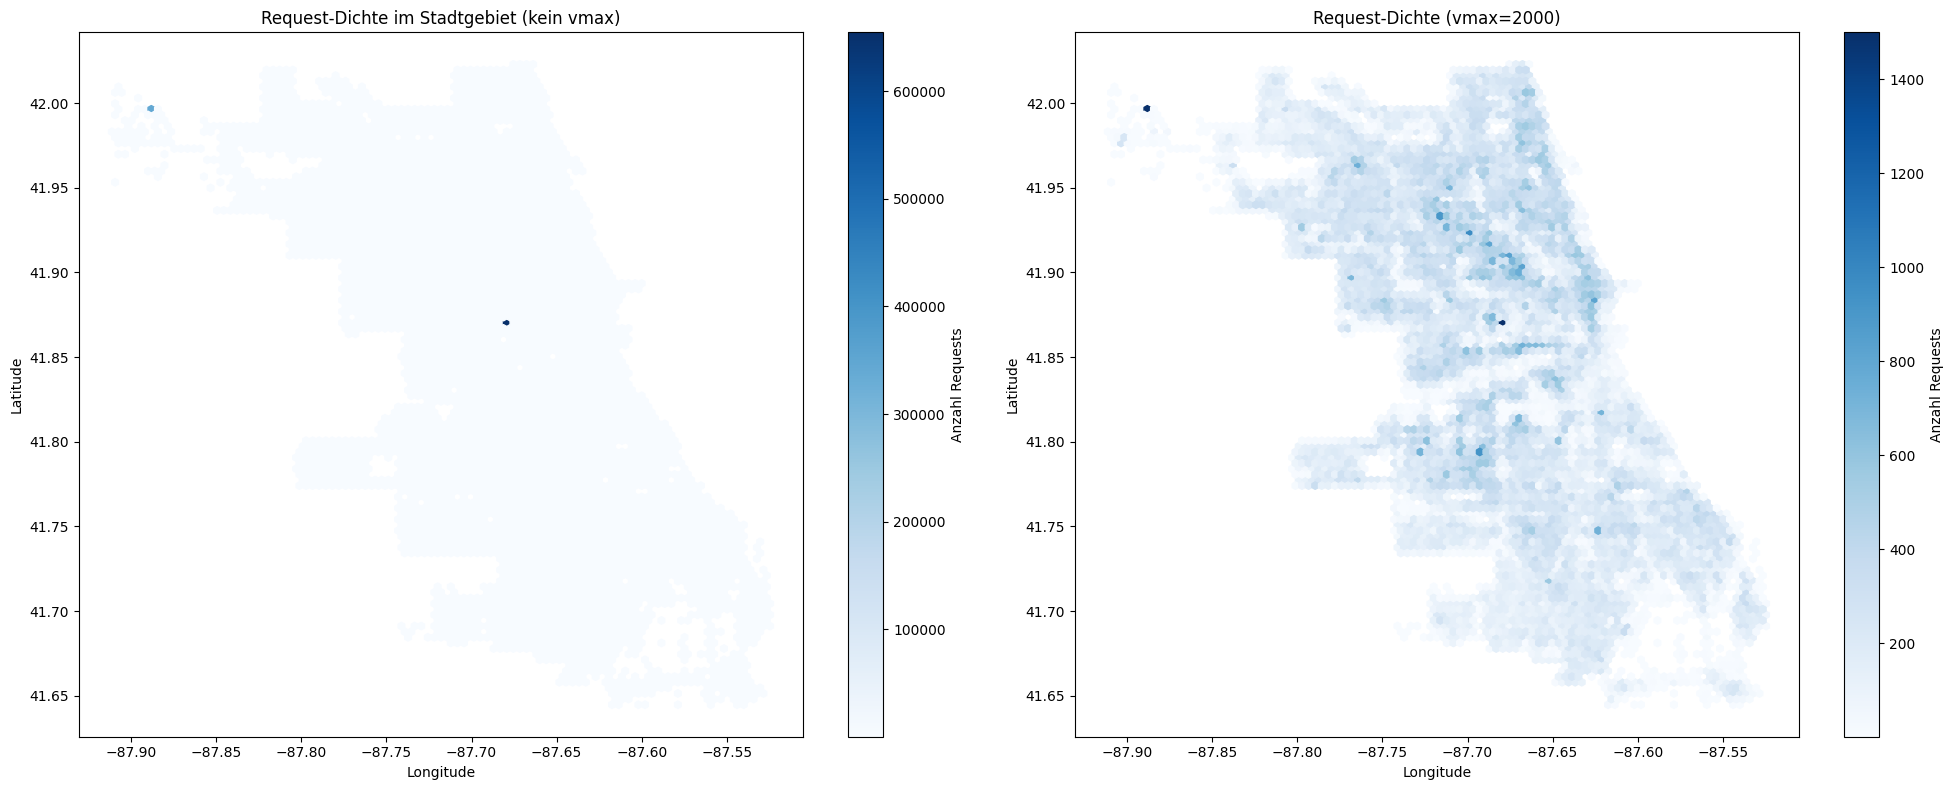

In [47]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,8))  # 1 Zeile, 2 Spalten

# Plot 1: Ohne vmax
hb1 = axes[0].hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=100, cmap='Blues', mincnt=1)
cb1 = fig.colorbar(hb1, ax=axes[0])
cb1.set_label('Anzahl Requests')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Request-Dichte im Stadtgebiet (kein vmax)')

# Plot 2: Mit vmax auf 1500 gesetzt 
hb2 = axes[1].hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=100, cmap='Blues', mincnt=1, vmax=1500)
cb2 = fig.colorbar(hb2, ax=axes[1])
cb2.set_label('Anzahl Requests')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Request-Dichte (vmax=2000)')

plt.tight_layout()
plt.show()

### 3.3 Hexbin - linear, linear mit vmax und logarithmisch

 Visualisierung der Request-Dichte
 Next step: karte über eine karte von chicago legen (vllt google maps satelit bild) und vergleichen: sind die Hotspots öffentliche Orte (Fussbalstation, Bahnhof oder so) die die Häufigkeit erklären oder werden solche Koordinaten als "standard" vom System gesetzt?

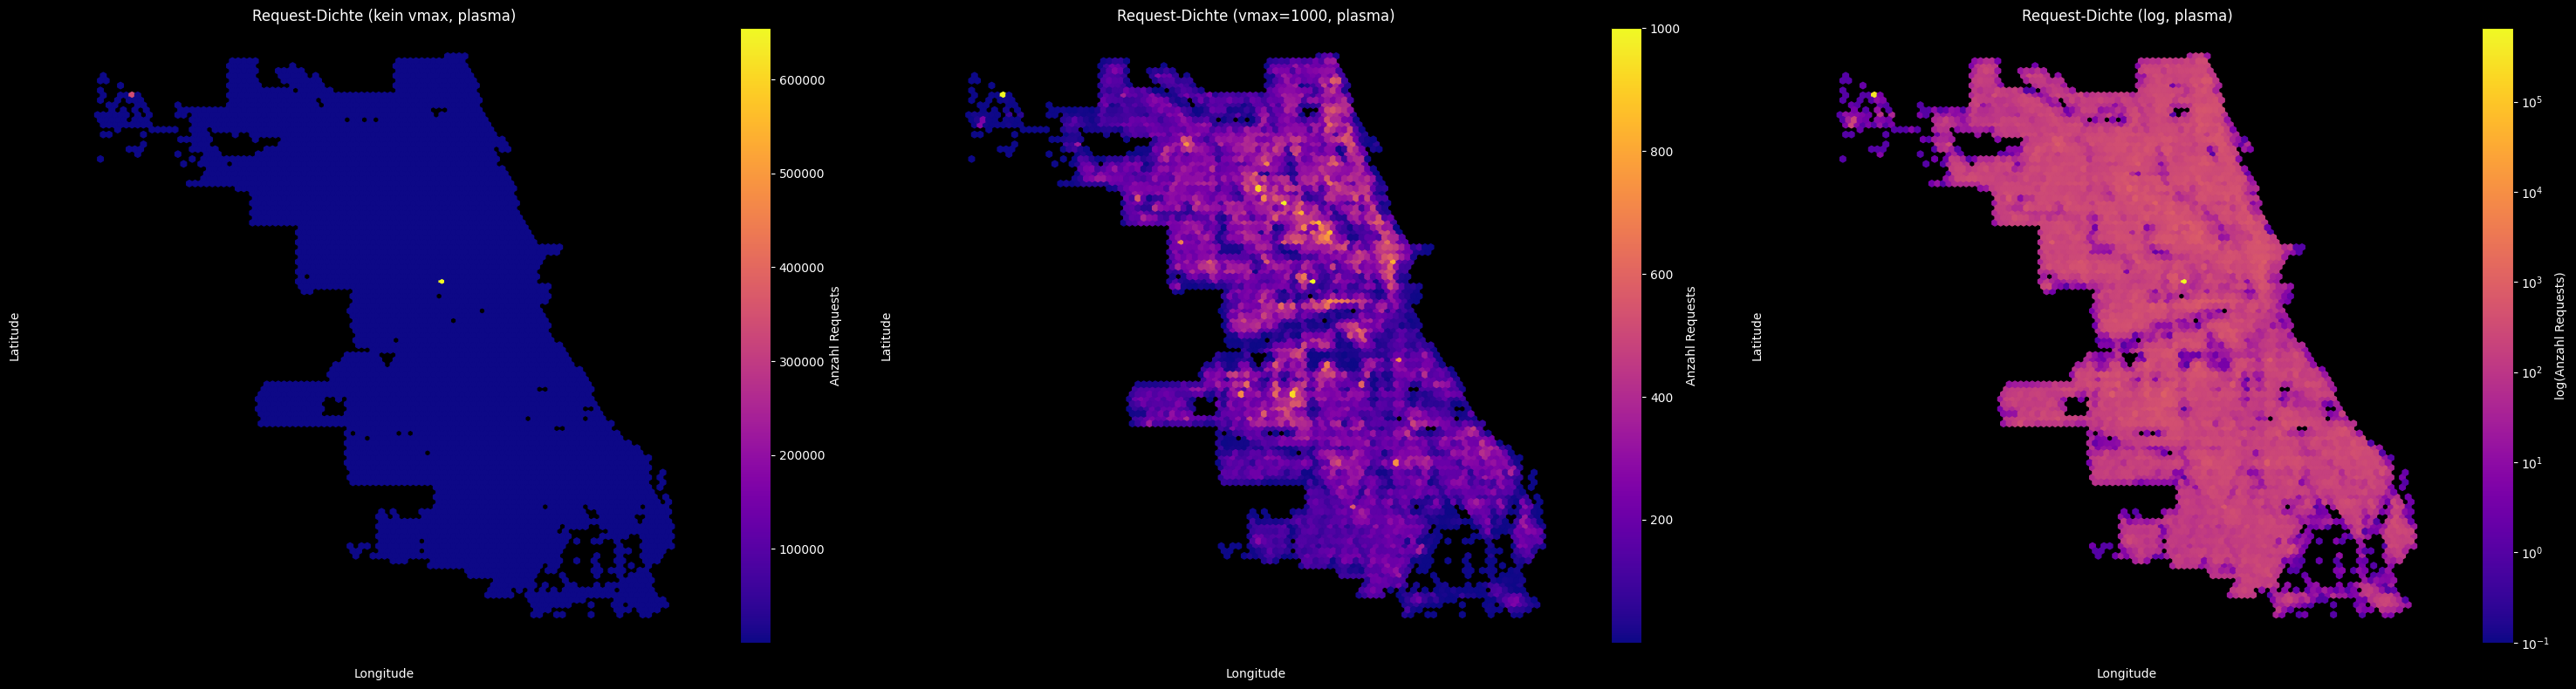

In [48]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(30,8), facecolor='black')

cmap = plt.cm.plasma.copy()
cmap.set_under('black')  # Hexagons unter vmin werden schwarz

# Plot 1: Linear, ohne vmax
axes[0].set_facecolor('black')
hb1 = axes[0].hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=100, cmap=cmap, mincnt=1, vmin=0.1)
cb1 = fig.colorbar(hb1, ax=axes[0])
cb1.set_label('Anzahl Requests', color='white')
cb1.ax.yaxis.label.set_color('white')
cb1.ax.tick_params(colors='white')
axes[0].set_xlabel('Longitude', color='white')
axes[0].set_ylabel('Latitude', color='white')
axes[0].set_title('Request-Dichte (kein vmax, plasma)', color='white')

# Plot 2: Linear, mit vmax
axes[1].set_facecolor('black')
hb2 = axes[1].hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=100, cmap=cmap, mincnt=1, vmin=0.1, vmax=1000)
cb2 = fig.colorbar(hb2, ax=axes[1])
cb2.set_label('Anzahl Requests', color='white')
cb2.ax.yaxis.label.set_color('white')
cb2.ax.tick_params(colors='white')
axes[1].set_xlabel('Longitude', color='white')
axes[1].set_ylabel('Latitude', color='white')
axes[1].set_title('Request-Dichte (vmax=1000, plasma)', color='white')

# Plot 3: Logarithmisch
axes[2].set_facecolor('black')
hb3 = axes[2].hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=100, cmap=cmap, mincnt=1, vmin=0.1, bins='log')
cb3 = fig.colorbar(hb3, ax=axes[2])
cb3.set_label('log(Anzahl Requests)', color='white')
cb3.ax.yaxis.label.set_color('white')
cb3.ax.tick_params(colors='white')
axes[2].set_xlabel('Longitude', color='white')
axes[2].set_ylabel('Latitude', color='white')
axes[2].set_title('Request-Dichte (log, plasma)', color='white')

plt.tight_layout()
plt.show()

Erkenntnisse: 

Der erste Plot (linkes): Der lineare Plot wird durch sehr dichte Bereiche dominiert. Dadurch sind Unterschiede in anderen Bereichen nicht mehr sichtbar, da die Regionen mit hocher dichte den ganzen Wertebereich dominieren.  

Der zweite Plot (mittlere): Der lineare Plot mit vmax von 1000 begrenzt die maximale Farbintensität auf 1000. Das bedeuted, dass einem Bereich auf Plot maximal 1000 Requests geplotted werden können, wodurch die Regionen mit hocher Dichte weniger nicht mehr den Plot dominieren. Der Plot zeigt mehr räumliche Strukturen im Vergleich zum ersten Plot.

Der dritte Plot (rechts): Der log Plot verwendet eine log-Skalierung, wodurch Regionen mit hocher Dichte weniger extrem erscheinen. Mit dem Plot werden auch weniger dichte Regionen erkennbar aber kein Bereich verliert seinen echten Wert. 

## 4. Hotspot Analyse

Gab es bei den extremen räumlichen Hotspots wirklich mehr Anfragen (realer Effekt) oder handelt es sich um ein Default-Value?

Zur Analyse wurden die Hotspots identifiziert, indem die gerundeten Koordinaten aggregiert wurden, und die Verteilung der SR-Types evaluiert wurde. 


In [49]:
df_geo = df.dropna(subset=["LATITUDE", "LONGITUDE"]).copy()
df_geo["LAT_round"] = df_geo["LATITUDE"].round(3)
df_geo["LON_round"] = df_geo["LONGITUDE"].round(3)

top_coords = (
    df_geo.groupby(['LATITUDE', 'LONGITUDE'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

# Die ersten 10 Orte mit den meisten Beschwerden zeigen:
print(top_coords.head(10))


        LATITUDE  LONGITUDE   count
204207    41.872    -87.680  654657
383819    41.995    -87.888  343642
251910    41.906    -87.686     472
161090    41.818    -87.621     460
135268    41.795    -87.728     457
143498    41.801    -87.646     448
70134     41.749    -87.624     439
238349    41.896    -87.768     427
35859     41.717    -87.654     421
294904    41.932    -87.716     407


Identifizierung mithilfe von Google Maps:

41.872  -87.690: "311 Operations" und "The Chicago Department of Public Health" (Gesundheitsamt)  --> wurde wahrscheinlich als default value genutzt.

41.995  -87.888: "City of Chicago, Department of Aviation" (Stadtverwaltung) 

In [56]:
hotspot1 = df[(df['LATITUDE'].round(3) == 41.872) & (df['LONGITUDE'].round(3) == -87.680)]
hotspot2 = df[(df['LATITUDE'].round(3) == 41.995) & (df['LONGITUDE'].round(3) == -87.888)]

### 4.1 Analyse Hotspot 1

In [68]:
print("Hotspot 1 (41.872,-87.680): ")
print(hotspot1['SR_TYPE'].value_counts(dropna=False))

Hotspot 1 (41.872,-87.680): 
SR_TYPE
311 INFORMATION ONLY CALL                   654507
Cab Feedback                                   125
Pothole in Street Complaint                      6
Graffiti Removal Request                         5
Tree Removal Inspection                          3
Aircraft Noise Complaint                         2
Blue Recycling Cart                              2
Dead Animal Pick-Up Request                      2
Street Light Out Complaint                       2
Finance Parking Code Enforcement Review          2
Building Violation                               2
Inspect Public Way Request                       1
Divvy Bike Parking Complaint                     1
E-Scooter Parking Complaint                      1
Business Complaints                              1
Street Light Pole Door Missing Complaint         1
Ridesharing Complaint                            1
Water On Street Complaint                        1
Sign Repair Request - All Other Signs        

##### Haben Requests des Types "311 INFORMATION ONLY CALL" eine dominiante Default-Koordinate?

In [73]:
info_df = df_geo[df_geo["SR_TYPE"] == "311 INFORMATION ONLY CALL"].copy()

info_df["LAT_round"] = info_df["LATITUDE"].round(3)
info_df["LON_round"] = info_df["LONGITUDE"].round(3)

info_top_coords = (info_df.groupby(["LAT_round", "LON_round"]).size().sort_values(ascending=False).head(10)) #zeigt die top 10 häufigsten Koordinaten von Informatin Calls an (gesorted)

info_top_coords

LAT_round  LON_round
41.872     -87.680      654507
41.880     -87.707          53
41.870     -87.678          36
41.874     -87.706          35
41.779     -87.661          32
41.873     -87.676          30
41.895     -87.621          27
41.766     -87.606          25
41.858     -87.628          25
41.880     -87.768          23
dtype: int64

Bei Hotspot treten fast ausschliesslich nur Requests des Types ""311 INFORMATION ONLY CALL" auf. Fast alle Requests von diesem Type befinden sich an dieser Koordinate. Da sich bei diesem Hotspot das "311 Operations" und "The Chicago Department of Public Health" (Gesundheitsamt) befindet, ist es sehr wahrscheinlich, dass diese Koordinate als Defaul-Value im Erfassungsprozess verwendet wurde. 


### 4.2 Analyse Hotspot 2

In [67]:
print("\nHotspot 2 (41.995, -87.888): ")
print( hotspot2['SR_TYPE'].value_counts(dropna=False))


Hotspot 2 (41.995, -87.888): 
SR_TYPE
Aircraft Noise Complaint     343623
Cab Feedback                     15
311 INFORMATION ONLY CALL         4
Name: count, dtype: int64


#### Haben Requests des Types "Aircraft Noise Complaint" eine dominiante Default-Koordinate?

In [75]:
aircraft_df = df_geo[df_geo["SR_TYPE"] == "Aircraft Noise Complaint"].copy()

aircraft_df["LAT_round"] = aircraft_df["LATITUDE"].round(3)
aircraft_df["LON_round"] = aircraft_df["LONGITUDE"].round(3)

aircraft_top_coords = (aircraft_df.groupby(["LAT_round", "LON_round"]).size().sort_values(ascending=False).head(10)) #zeigt die top 10 häufigsten Koordinaten von aircraft noise complaints an (gesorted)

aircraft_top_coords

LAT_round  LON_round
41.995     -87.888      343623
41.788     -87.742          24
41.995     -87.734           5
41.976     -87.905           4
41.780     -87.734           3
41.980     -87.902           3
41.720     -87.682           3
41.872     -87.680           2
41.790     -87.742           2
41.991     -87.747           2
dtype: int64

Beim zweiten Hotspot treten fast ausschliesslich Requests des Typs „Aircraft Noise Complaint“ auf.
Fast alle Requests von diesem Type befinden sich an dieser Koordinate. 
Bei diesen Koordinaten befindet sich das "City of Chicago, Department of Aviation", welches gleich am Flughafen liegt, wo Fluglärm zu erwarten ist. Aufgrund der klaren Ortsgebundenheit von Fluglärmbeschwerden spricht dieser Hotspot eher für einen realen räumlichen Effekt. Gleichzeitig kann nicht vollständig ausgeschlossen werden, dass diese Meldungen diese Koordinaten als Default-Values haben, da das Department of Aviation für die Bearbeitung von Fluglärmbeschwerden zuständig ist.

## 5. Type Spezifische Beispiele der Räumliche Dichte 

### 5.1 Räumliche Dichte "Rodent Baiting/Rat Complaint"

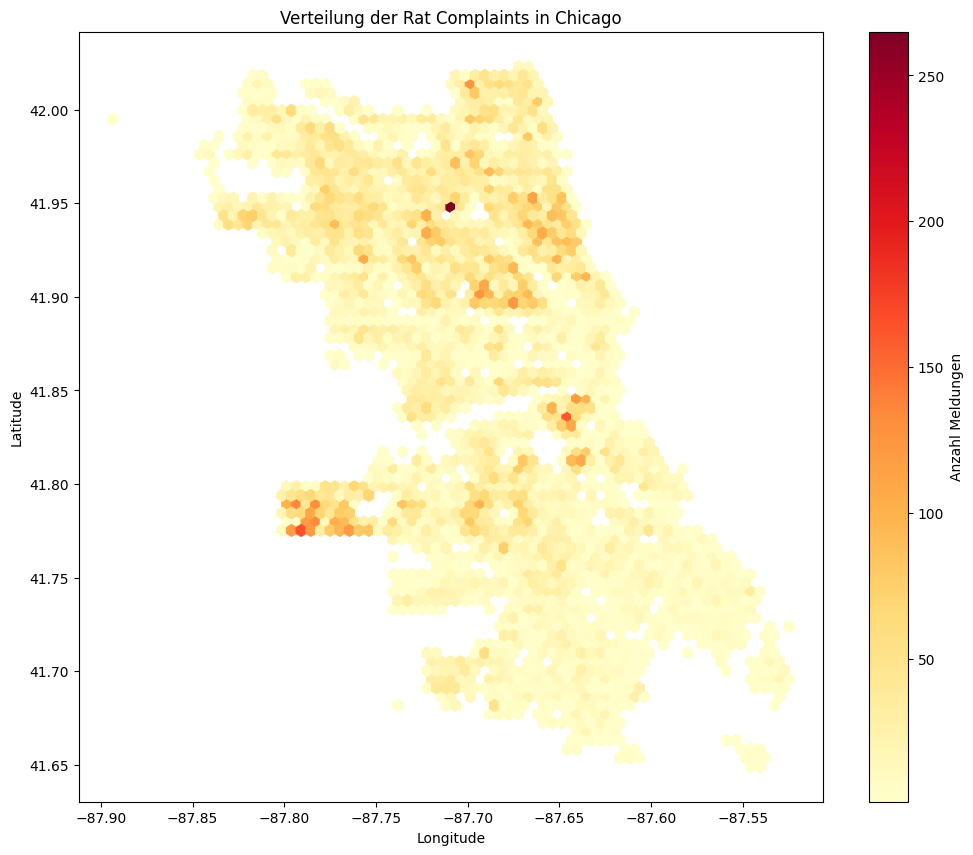

In [52]:
# Für typischen Key wie 'SR_TYPE' oder spezifischen Complaint-Text
rat_df = df[df["SR_TYPE"] == "Rodent Baiting/Rat Complaint"]

plt.figure(figsize=(12,10))
plt.hexbin(
    rat_df['LONGITUDE'],
    rat_df['LATITUDE'],
    gridsize=70,
    cmap='YlOrRd',
    mincnt=1
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Verteilung der Rat Complaints in Chicago')
plt.colorbar(label='Anzahl Meldungen')
plt.show()

In [53]:
#top 10
top_rat_coords = (
    rat_df.groupby(['LATITUDE', 'LONGITUDE'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

# Top 10 anzeigen:
print(top_rat_coords.head(10))


       LATITUDE  LONGITUDE  count
9681     41.817    -87.635     45
4612     41.774    -87.788     40
17336    41.920    -87.757     39
22383    41.948    -87.711     30
22376    41.948    -87.711     30
26260    41.977    -87.701     26
24042    41.959    -87.713     25
27958    41.995    -87.749     25
22402    41.948    -87.711     24
28142    41.997    -87.685     24


### 5.2 Räumliche Dichte Graffiti Complaint


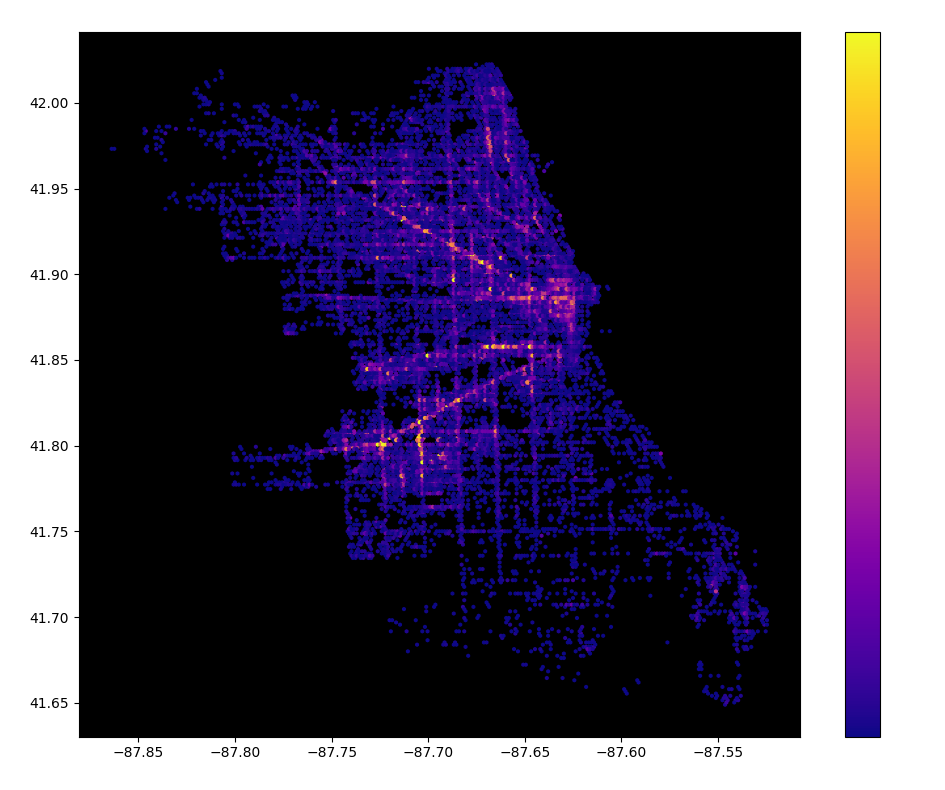

In [94]:
# Graffiti Complaints filtern
graffiti_df = df_geo[df_geo["SR_TYPE"] == 'Graffiti Removal Request'].copy()

fig, ax = plt.subplots(figsize=(10, 8))
ax.set_facecolor("black")
hb = ax.hexbin(graffiti_df["LONGITUDE"],graffiti_df["LATITUDE"],gridsize=250,mincnt=1,cmap="plasma",vmax=100)
cb = fig.colorbar(hb, ax=ax)
cb.set_label("Anzahl Requests", color="white")
cb.ax.tick_params(colors="white")
ax.set_xlabel("Longitude", color="white")
ax.set_ylabel("Latitude", color="white")
ax.set_title("Räumliche Dichte: Graffiti Complaints (vmax = 170)", color="white")

plt.tight_layout()
plt.show()


## 6. Hypothesentest mit kategorialen Daten - Ergänzung zum EDA


In diesem Kapitel wird untersucht, ob die räumliche Verteilung von Street Light Out Complaints anders als die der übrigen Request-Types.

„Street Light Out“ vs. ELECTRICAL_DISTRICT / ELECTRICITY_GRID

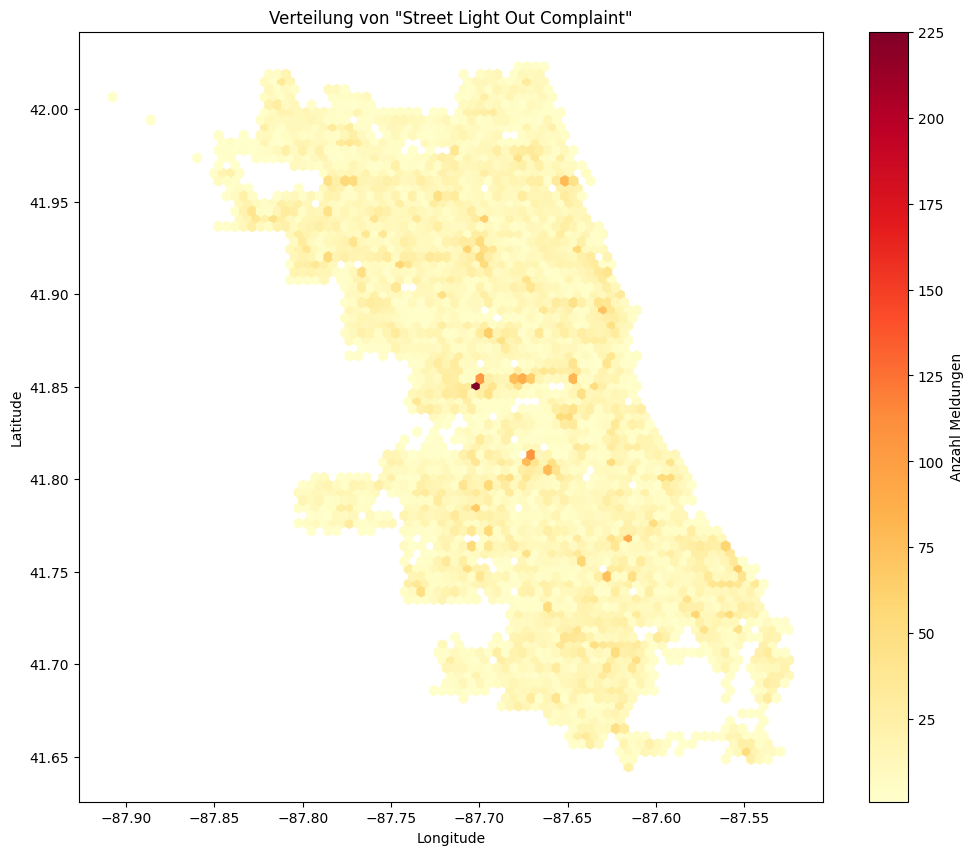

In [54]:
# Für typischen Key wie 'SR_TYPE' oder spezifischen Complaint-Text
streetlight_df = df[df["SR_TYPE"] == "Street Light Out Complaint"]

plt.figure(figsize=(12,10))
plt.hexbin(
    streetlight_df['LONGITUDE'],
    streetlight_df['LATITUDE'],
    gridsize=80,
    cmap='YlOrRd',
    mincnt=1
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Verteilung von "Street Light Out Complaint"')
plt.colorbar(label='Anzahl Meldungen')
plt.show()

In [55]:
df_slo = df[df["SR_TYPE"] == "Street Light Out Complaint"].copy() #nach SLO Complaint filtern
print(f"Anzahl 'Street Light Out Complaint' insgesamt: {len(df_slo)}")

# Anzahl mit ELECTRICITY_GRID ungleich NaN
with_grid = df_slo["ELECTRICITY_GRID"].notna().sum()
percent_with_grid = with_grid / len(df_slo) * 100

print(f"Anzahl mit ELECTRICITY_GRID: {with_grid}")
print(f"Prozent mit ELECTRICITY_GRID: {percent_with_grid:.2f} %")

# Anzahl SLO Complaint pro Electricity Grid
df_slo_grid = df_slo.dropna(subset=["ELECTRICITY_GRID"])

grid_counts = df_slo_grid["ELECTRICITY_GRID"].value_counts()
grid_percent = df_slo_grid["ELECTRICITY_GRID"].value_counts(normalize=True) * 100

print("\nAnzahl pro ELECTRICITY_GRID (Street Light Out Complaint):")
print(grid_counts)



Anzahl 'Street Light Out Complaint' insgesamt: 39171
Anzahl mit ELECTRICITY_GRID: 39030
Prozent mit ELECTRICITY_GRID: 99.64 %

Anzahl pro ELECTRICITY_GRID (Street Light Out Complaint):
ELECTRICITY_GRID
I027    309
L032    237
M033    192
N029    170
K026    167
L026    155
T034    152
J023    144
P021    131
H027    124
N046    123
I026    123
P041    122
W039    122
I016    119
N045    118
N012    116
J017    114
I036    114
Q022    113
L019    113
V045    111
A011    111
J034    110
H040    108
V114    106
O026    105
U044    103
Q021    103
P048    102
X114    102
I034    102
R038    100
L033    100
Q038     99
S037     99
Y116     99
W044     99
N021     98
J032     96
K039     95
P027     95
P046     95
I014     95
G025     93
X041     93
O040     93
Y118     92
C014     92
M026     92
H034     91
P023     91
G020     91
K027     90
M021     90
W114     90
Q047     90
V113     90
O046     90
R041     90
Q023     89
E041     89
C021     89
I018     88
H017     88
G013     88
J037  

H0: Street Light Out complaints sind gleich über ELECTRICAL_DISTRICT verteilt wie andere SR_Types.

H1: Street Light Out complaints treten in bestimmten Stromdistrikten signifikant häufiger auf.

### Hinweis zur statistischen Inferenz

Eine formale Hypothesenprüfung zur räumlichen Verteilung von Street Light Out Complaints
wird bewusst nicht durchgeführt. Die Electricity Districts unterscheiden sich stark in
Grösse, Infrastruktur und Exposition, sodass eine Gleichverteilung oder ein direkter
Vergleich mit anderen Request-Typen keine sinnvolle Nullhypothese darstellt.

Zudem weist die Variable ELECTRICAL_DISTRICT eine nicht zufällige Missingness auf, was
die Annahmen klassischer Chi-Quadrat-Tests zusätzlich verletzen würde. Die Analyse bleibt
daher bewusst explorativ und fokussiert sich auf die visuelle und deskriptive Untersuchung
räumlicher Muster.

## 7. Fallnotiz

### Fallnotiz – Geodatenanalyse

| Regel / Analyse | Vorgehen / Schwelle | Datum | Ergebnis | Entscheidung | Anmerkung |
| --- | --- | --- | --- | --- | --- |
| Prüfung der Koordinaten | Gültige Latitude / Longitude | 20.11.25 | Plausible Geodaten vorhanden | Geodaten für Analyse verwendet | Keine systematische Fehler identifiziert |
| Räumliche Visualisierung | Hexbin | 16.10.25 | Klare räumliche Konzentrationen | Hotspot-Analyse durchgeführt | Explorative Darstellung |
| Umgang mit Ausreissern | Log-Skalierung der Dichte | 20.11.25 | Extreme Dichten abgeschwächt | Keine Entfernung von Daten | Feinere räumliche Verteilungen besser sichtbar |
| Umgang mit Ausreissern | vmax gesetzt | 16.10.25 | Lokale Unterschiede besser sichtbar | Darstellung angepasst | Feinere räumliche Verteilungen besser sichtbar |

